##**Define the Problem**
 

*  The PlayStore app data has enormous potential to drive app-making businesses to success.
*   Actionable insights can be drawn for developers to work on and capture the Android market. Each app (row) has values for catergory, rating, size, and more.
*   Another dataset contains customer reviews of the android apps. Explore and analyze the data to discover key factors responsible for app engagement and success.






##**Description of Dataset**
Let's take a look at the data, which consists of two files:

* playstore.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
* user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.


We are going to use a simple csv file "Playstore.csv",Before getting into data, let's have a look at our dataset :-


1.   App :- Name of the App
2.   Category :- Category under which the App falls.
3.   Rating :- Application's rating on playstore
4.  Reviews :- Number of reviews of the App.
5.  Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- Whether the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropriate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App


##**Breakdown of Dataset**

In [16]:
# This Python 3 environment comes with many helpful analytic libraries
# For example, here are several helpful packages to load
# importing necessary libraries for future analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from google.colab import files
%matplotlib inline

In [17]:
!pip install wordcloud 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
# for removing Future Warnings in seaborn plots
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [19]:
# importing the data from the drive and reading the csv file.
dataset= pd.read_csv('/content/drive/MyDrive/capstone !/play store/Play Store Data.csv')
dataset1=pd.read_csv('/content/drive/MyDrive/capstone !/play store/User Reviews.csv')

In [20]:
# Let's view data
dataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
# Let's check the information of the Playstore data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


So this information gives us an idea of our work with different data types and number of rows and columns.

###**Data cleaning**
Data cleaning is one of the most essential subtask of any data science project. Although it can be a very tedious process, it's worth should never be undermined.

* By looking at a random sample of the dataset rows (from the above task), we observe that some entries in the columns like Installs,Price and Size have a few special characters (+ , $ ,M , k) .This prevents the columns from being purely numeric, making it difficult to use them in subsequent future mathematical calculations. Ideally, as their names suggest, we would want these columns to contain only digits from [0-9].

* Hence, we now proceed to clean our data. Specifically, the special characters "," and "+" present in Installs column and "$" present in Price column need to be removed.

* It is also always a good practice to print a summary of your dataframe after completing data cleaning. We will use the info() method to acheive this.

In [22]:
# As we can see there is  an error in row 10472 so lets remove it
dataset=dataset.drop(10472)

In [23]:
# function to convert whole column in one format
def format(value):
  if value[-1:] == "k":
     return float(value[0:-1])/1000
  elif value[-1:] == "M":
     return  value
  else:
     return np.nan 
dataset.rename(columns = {'Size':'Size(Mb)'}, inplace = True)  

dataset["Size(Mb)"]=dataset["Size(Mb)"].map(lambda x: format(x))
# Replace "M" with an empty string 
dataset["Size(Mb)"]=dataset["Size(Mb)"].apply(lambda x: str(x).replace('M',"") if 'M' in str(x) else x)

In [25]:
# replace "$" sign and using "astype()" to convert the "price" column into float
dataset["Price"]=dataset["Price"].str.replace("$","")

In [26]:
# lets replace  "+" and "," it with an empty string
dataset["Installs"]=dataset["Installs"].str.replace("+","").str.replace(",","")

###**Correcting data types**
* From the previous task we noticed that Installs and Price were categorized as object data type. This is because these two columns originally had mixed input types: digits and special characters.

* The four features that we will be working with most frequently henceforth are Installs, Size, Rating and Price. While Size and Rating are both float (i.e. purely numerical data types), we still need to work on Installs and Price to make them numeric.

In [27]:
# Change the data type to float
dataset["Reviews"]=pd.to_numeric(dataset["Reviews"])
dataset["Installs"]=dataset["Installs"].astype(float)
dataset["Price"]=dataset["Price"].astype(float)
dataset["Size(Mb)"]=dataset["Size(Mb)"].astype(float)

As the datatype of  all columns is correct, so we can move ahead.

###**Exploratory data analysis**

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

* let's make our exploratory data analysis more amazing by assuming it as a story, just like any other story, there will be one main character "Installs" around which our whole story will revolve and we will discover who are his friends, foes, and the ones who just don't care about him.

* As we can see there is one more character who is just a duplicate of "Category" that is "genres", so our main task is to remove it from the story, so that the audience will not get confused between the "Category" and "genres", along with it we will remove some other characters as well, as you know we can represent only important scenarios that it related to our main character.
* let's move to the visualization part, we will transform our character to a state where it is really easy for our audience to get an idea about him.


####**Observation 1**

* Now we'll get into the fun part. We will try different visualization techniques to understand the life of our main character "Installs" and other characters.

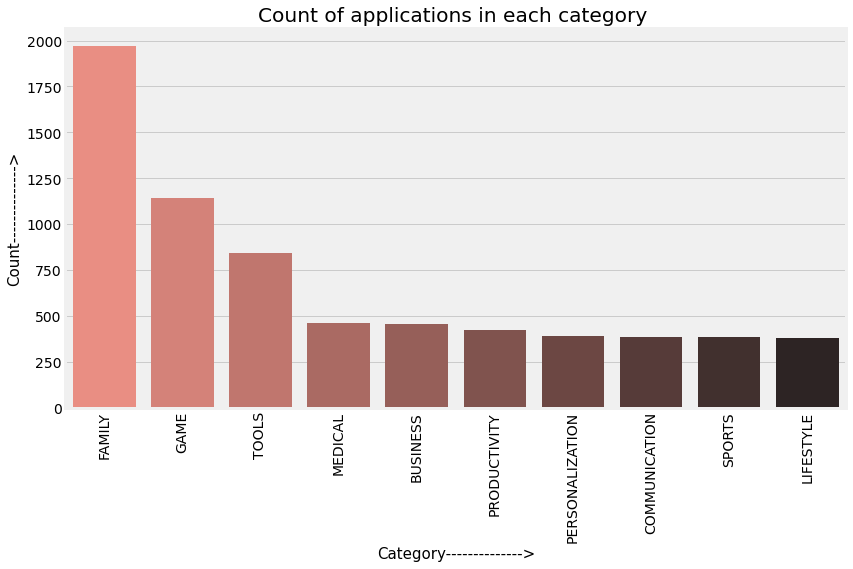

In [28]:
# ploting countplot for "Category" column
plt.figure(figsize=(14,7))
plt.style.use("fivethirtyeight")
sns.countplot('Category',data=dataset,
              order=dataset.Category.value_counts().head(10).index,palette="dark:salmon_r")
plt.xlabel("Category-------------->", fontsize=15)
plt.ylabel("Count-------------->", fontsize=15)
plt.title("Count of applications in each category ")
plt.xticks(rotation=90)
plt.show();

* Now we know that the 'Family' and 'Game' category rules the play store market, followed by Tools, Medical, and Business. Okay Cool ..... Data Analytics will understand our daily requirements and fill the market with similar apps.
* So let's compare our main character "installs" with "category" which is one of the other characters.

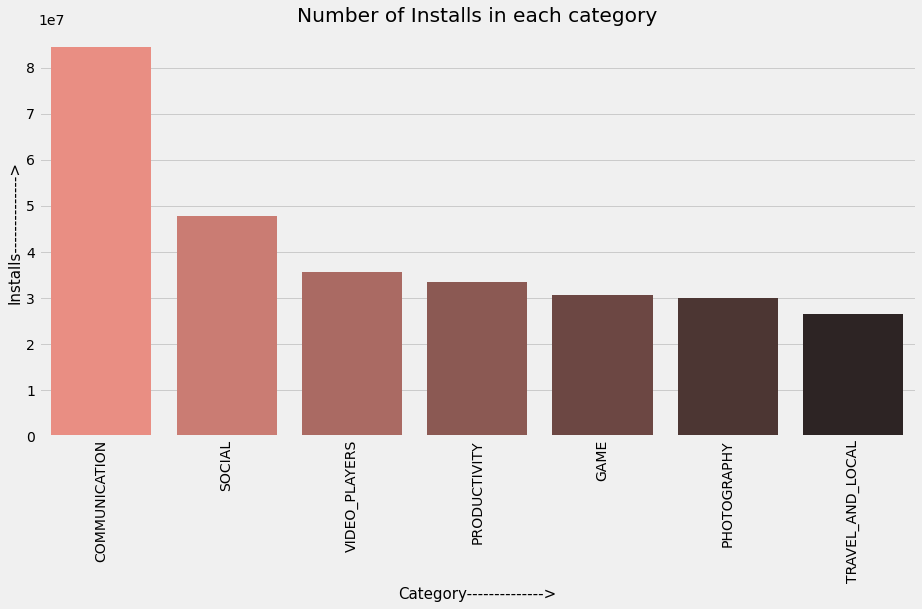

In [29]:
# here we are using group by function to group category and installs.
scene_1=(dataset.groupby("Category").agg({"Installs":"mean"})
        .sort_values(by="Installs",ascending=False)
        .reset_index().head(7))
point_1=pd.DataFrame(scene_1)

# we are plotting bar plot for above grouped dataframe
plt.figure(figsize=(14,7))
plt.style.use("fivethirtyeight")
sns.barplot(y="Installs",x="Category",data=point_1,palette="dark:salmon_r")
plt.xlabel("Category-------------->", fontsize=15)
plt.ylabel("Installs-------------->", fontsize=15)
plt.title("Number of Installs in each category")
plt.xticks(rotation=90)
plt.show();

Woww... Family betrayed our 'Installs'.As we have seen so far, the list of Top 7 Characteristics of 'Category' (acc. to the number of apps developed) and Top 6 Characteristics (acc. to number of Installs) differ a lot.
We can feel this story. As data analyst, we can use this information to decide our future insights.

####**Observation 2**

* let's see some other character "ratings" for which we are using violin plot and density plot that makes our story content more interesting in visual aspects.

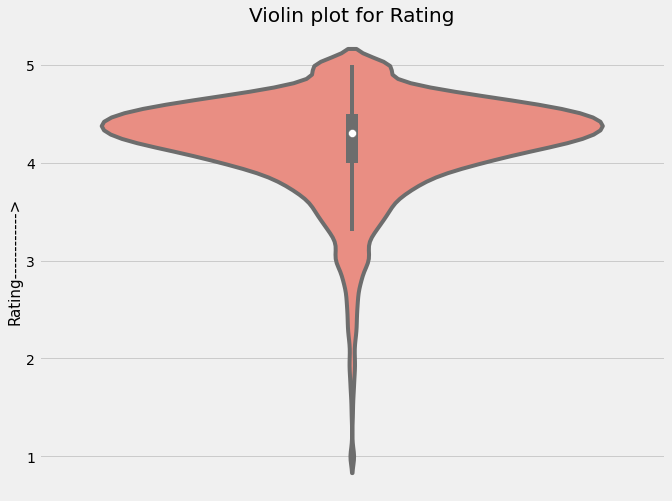

In [30]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
sns.violinplot(y="Rating",data=dataset,palette="dark:salmon_r" )
plt.ylabel("Rating------------>", fontsize=15)
plt.title("Violin plot for Rating")
plt.show();

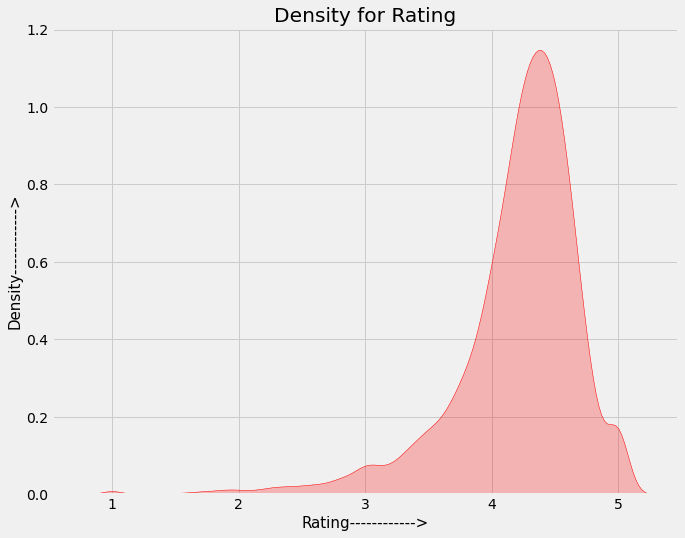

In [31]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
sns.kdeplot(dataset["Rating"],color="red",shade = True)
plt.xlabel("Rating------------>", fontsize=15)
plt.ylabel("Density------------>", fontsize=15)
plt.title("Density for Rating")
plt.show();

* From our research, we found that the average volume of ratings across all app categories is between 4-4.5.
* The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.


####**Observation 3**

 * our hero 'Installs' moves forward on his journey. He has two paths to go -> 'Free' and 'Paid'. Let's see what happens now and what moves our hero takes.

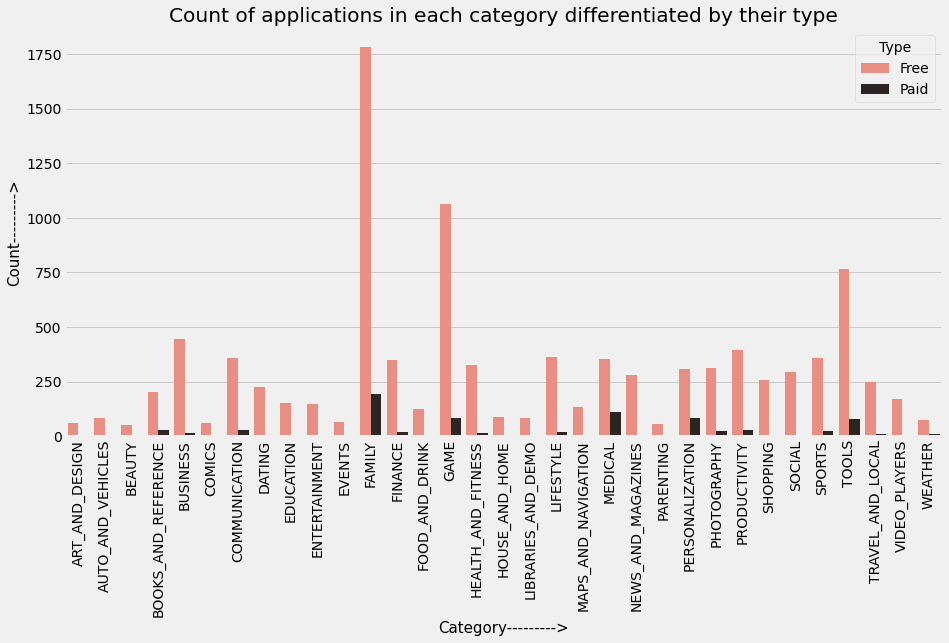

In [32]:
scene_3=dataset.groupby(["Category","Type"])["App"].count().reset_index()
point_3=pd.DataFrame(scene_3)
# we are plotting bar plot for above grouped dataframe
plt.figure(figsize=(14,7))
plt.style.use("fivethirtyeight")
sns.barplot(x="Category",y="App",hue="Type",data=point_3,palette="dark:salmon_r")
plt.xlabel("Category--------->", fontsize=15)
plt.ylabel("Count--------->", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.xticks(rotation=90)
plt.show();

* It looks like certain app categories have more free apps available for download than others. In our story, the majority of apps in the Family, Food & Drink, and Tools, as well as Social categories were free to install. 
* At the same time Family, Sports, Tools, and Medical categories had the biggest number of paid apps available for download.
* let's see how our hero "Installs" affects the results of the above chart.

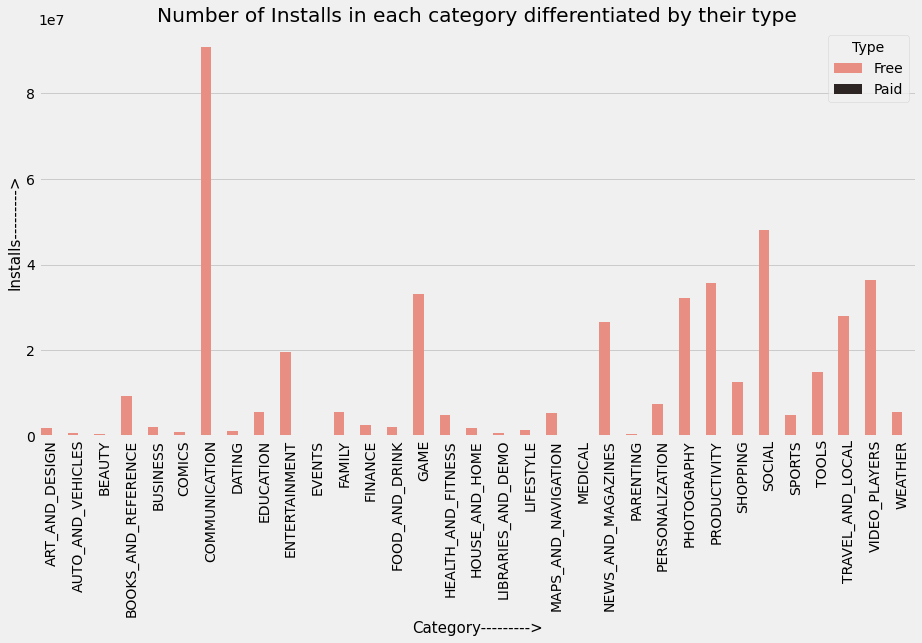

In [33]:
scene3=dataset.groupby(["Category","Type"]).agg({"Installs":"mean"}).reset_index()
point3=pd.DataFrame(scene3)
# we are plotting bar plot for above grouped dataframe
plt.figure(figsize=(14,7))
plt.style.use("fivethirtyeight")
sns.barplot(x="Category",y="Installs",hue="Type",data=point3,palette="dark:salmon_r")
plt.xlabel("Category--------->", fontsize=15)
plt.ylabel("Installs--------->", fontsize=15)
plt.title("Number of Installs in each category differentiated by their type")
plt.xticks(rotation=90)
plt.show();

* It can be concluded that the number of free applications installed by the user is high when compared with the paid ones.
* Yea... I know ... It was a boring part... It turns out that in our storyline we have two paths... 'Free' and "paid" which is approx negligible so let's ignore it and continue our story on a free path.

####**Observation 4**

Have you ever wondered if the Content Rating of the App plays an impact on its number of installations!!!
Let's feed our curiosity.

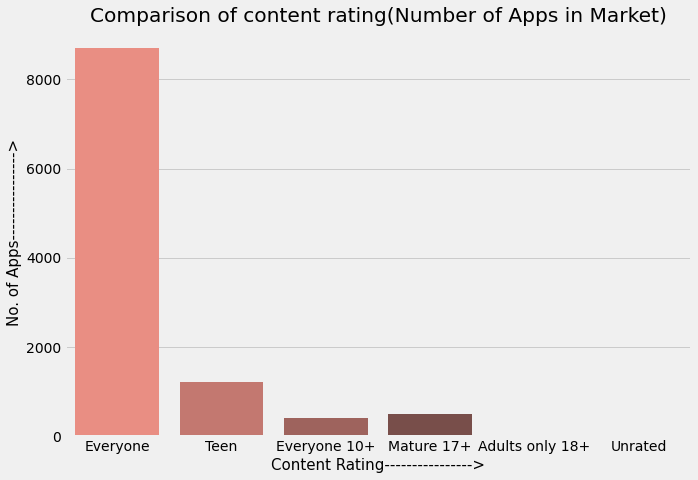

In [34]:
# we are using countplot to show the counts of content Rating
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
sns.countplot("Content Rating",data=dataset,palette="dark:salmon_r")
plt.xlabel("Content Rating---------------->",fontsize=15)
plt.ylabel("No. of Apps---------------->",fontsize=15)
plt.title("Comparison of content rating(Number of Apps in Market)")
plt.show();


* Okay !! It seems like 'Everyone' is the only choice for us to prefer when we are considering count.
* let's see how its behavior got changed with our hero "installs".

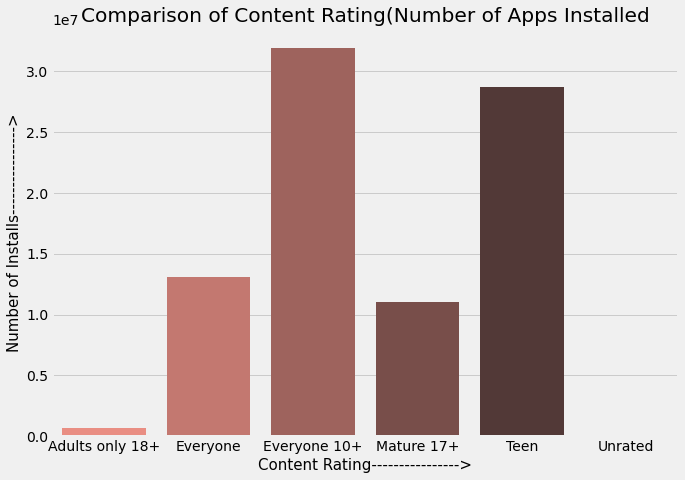

In [35]:
scene4=dataset.groupby("Content Rating").agg({"Installs":"mean"}).reset_index()
point_4=pd.DataFrame(scene4)
point_4
# we are plotting bar plot for above grouped dataframe
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
sns.barplot(y="Installs",x="Content Rating",data=point_4,palette="dark:salmon_r")
plt.title("Comparison of Content Rating(Number of Apps Installed")
plt.ylabel("Number of Installs---------------->",fontsize=15)
plt.xlabel("Content Rating---------------->",fontsize=15)
# Setting Figure size for future visualisation
sns.set(rc={"figure.figsize":(10,8)})

Number of 'Teen' Apps are few as compared to 'Everyone' but when we check its 'Number of Installations', it seems like a good second best choice. Few apps but Considerable Installations
* Ahaaa !! Our hero 'Install' just got his first good partner XD. Let's interrogate it.
* wow !!! Isn't that like a suspensive story twist By a little tweak, we have got a completely different story? 'Everyone' is an easy option but 'Teen' and '10+' are the most rewarding.


####**Observation 5**




let's introduce a new character "Size(Mb)" in the story, first, we will understand its role in our story then we will see his relationship with our hero "Installs".


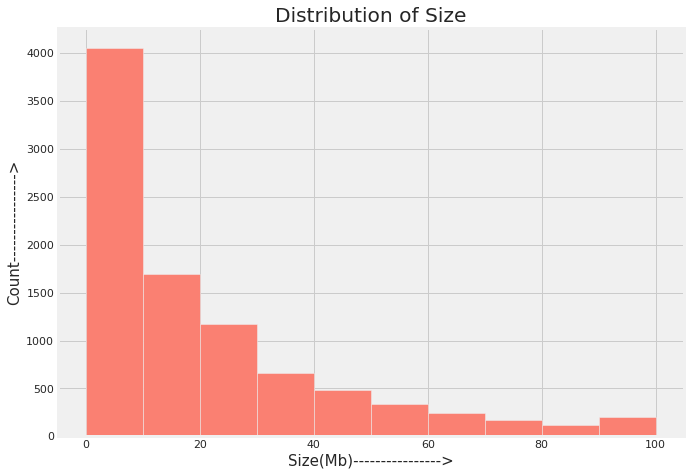

In [36]:
# Histogram
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.hist(dataset['Size(Mb)'],color="salmon")
plt.xlabel("Size(Mb)---------------->",fontsize=15)
plt.ylabel("Count---------------->",fontsize=15)
plt.title("Distribution of Size")
plt.show();

* From the above histogram, it can be concluded that maximum number of applications present in the dataset are of small size.
* lets see its relation with our hero.

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


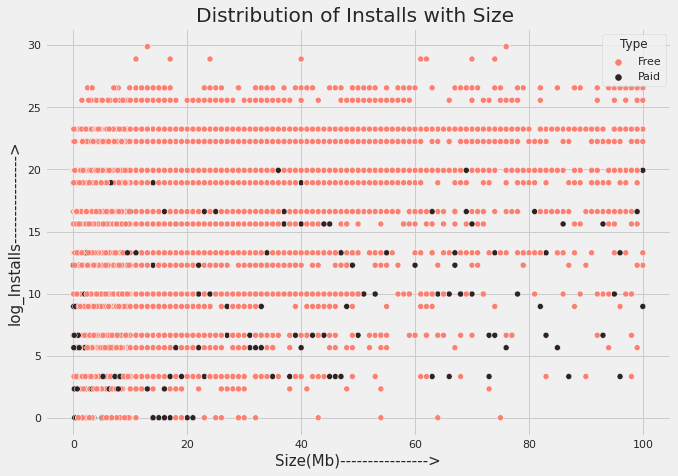

In [37]:
'''As we can notice,there is a high variance in the number of installs. 
To remove this we are adding a new column to dataframe, which is the log of number of installs'''
dataset['log_installs'] = np.log2(dataset['Installs'])
# Scatter-plot
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
sns.scatterplot(dataset['Size(Mb)'],dataset['log_installs'],hue=dataset["Type"],palette="dark:salmon_r")
plt.xlabel("Size(Mb)---------------->",fontsize=15)
plt.ylabel("log_Installs---------------->",fontsize=15)
plt.title("Distribution of Installs with Size ")
plt.show();

* It is clear from the above mentioned plot that size may impact the number of installations.
* Bulky applications are less installed by the user.
* our hero failed to impress big size Apps, on the other hand he works absolutely amazing with small size Apps.

####**Correlation check**

* Till now, our story has been building slowly. Now let's increase its pace and see the relationship of our hero 'Installs' with other characters......

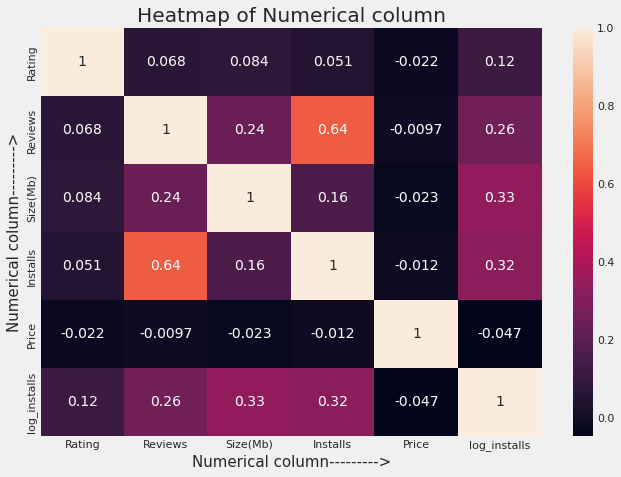

In [38]:
# heatmap syntax(always ploted on correlation)
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("Heatmap of Numerical column")
sns.heatmap(dataset.corr(),annot=True,robust=True)
plt.xlabel("Numerical column--------->", fontsize=15)
plt.ylabel("Numerical column--------->", fontsize=15)
plt.show();

* isn't surprising our main character is so alone in the story, no neighbor cares about him. They all are completely uncorrelated except for Reviews. 
Reviews seem to have some effect on the number of Installs, BUT WAIT We can be wrong here. It can be a minor data leakage condition. With more installs, more reviews will come to our story/dataset. So they are more codependent.

* lets justify our corelation check story part, which increase our story pace and see the relationship between "installs" and "Reviews"  

In [39]:
scene2=dataset.groupby('Category').agg({"Installs":"mean","Reviews":"mean"}).reset_index()
point_2=pd.DataFrame(scene2)

plt.style.use("fivethirtyeight")
fig = px.line(point_2, x=point_2.Category, y=point_2.columns[:],
              title='Catergory line plot', width=1000)

fig.update_layout(
    updatemenus=[
        dict(
            active=1,
            buttons=list([dict(label="None",
                     method="update",
                     args=[{"visible": [True for _ in range(186)]},
                           {"title": "Catergory line plot",
                            "annotations": []}])]) + list([
                dict(label=f"{j}",
                     method="update",
                     args=[{"visible": [True if i==idx else False for i in range(186)]},
                           {"title": f"{j}",
                            "annotations": []}]) for idx,j in enumerate(point_2.columns[1:])])
            )])
fig.show()

* As our hero "Installs" vs "Reviews" have a correlation value of 0.64, shows perfect and strong correlationfrom above line chart as both "installs" and "Reviews" follow the same pattern approximately.

####**Observation 6**

* let's describe a poster/hashtag for our storyline/data, which helps the audience to see some repetitive words of our story.


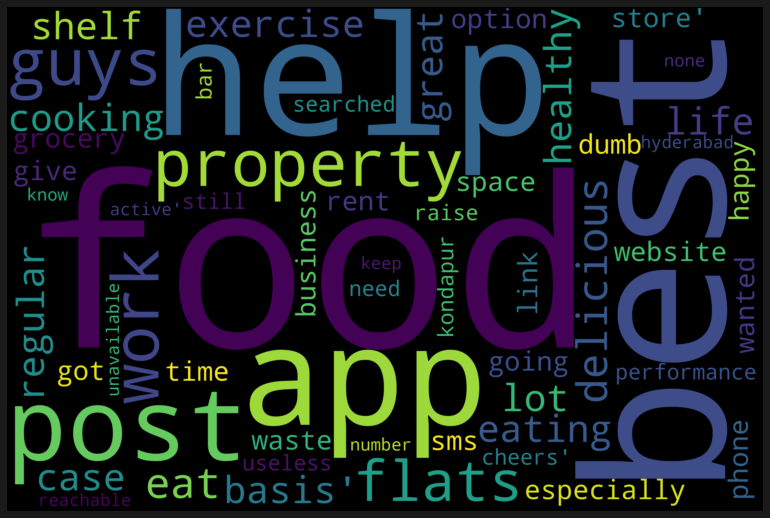

In [40]:
Review_notnull = dataset1[dataset1['Translated_Review'].notnull()]
#Wordcloud
from wordcloud import WordCloud, STOPWORDS
text = Review_notnull.Translated_Review.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text).lower())
fig = plt.figure(
    figsize = (14,7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

####**Observation 7**

* Before ending our story let me introduce the "Sentiment" of our story.
* sentiments give us an idea about the emotions of the story whether it's positive,negative or neutral

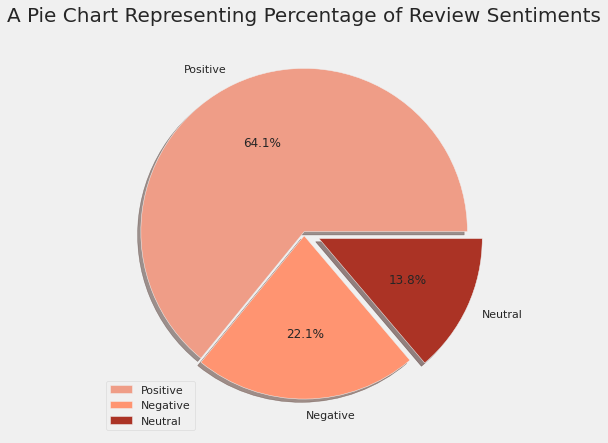

In [41]:
#Piechart
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
slices=dataset1.Sentiment.value_counts()
labels=['Positive','Negative','Neutral']
explode=[0,0.025,0.1]
colors = ['#EF9D87','#FF9471','#AB3325']
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(slices,labels=labels,explode=explode,colors = colors,autopct='%1.1F%%',shadow=True);
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.legend()
plt.show();

* As is clear from the pie charts there are 64.1 % of Positive sentiments, 22.1% of Negative sentiments, and 13.8% neutral sentiments.


####**Observation 8**


* let's dive deep down into sentiments to see a more depth understanding of sentiment Polarity and Subjectivity.

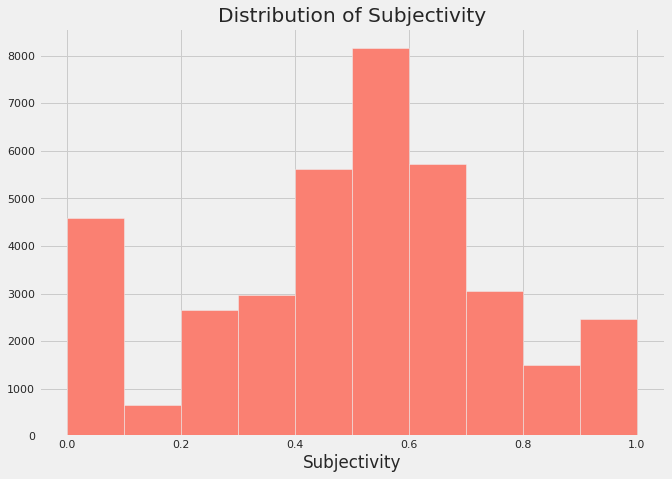

In [42]:
#Histogram
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(dataset1.Sentiment_Subjectivity.values,color="salmon")
plt.show();

* It can be seen that the maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this, we can conclude that the maximum number of the audience give reviews to the applications, according to their experience.

####**Observation 9**

* Does sentiments Polarity is proportional to sentiments subjectivity in our story?

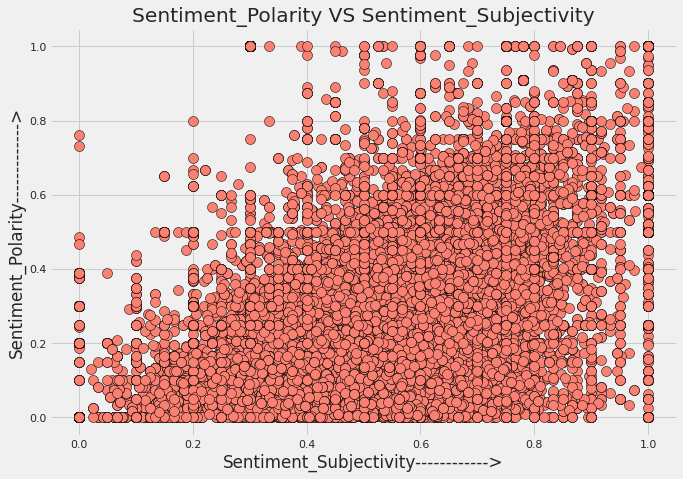

In [43]:
#Scatter plot
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
y=dataset1["Sentiment_Polarity"].abs()
x=dataset1["Sentiment_Subjectivity"].abs()
plt.scatter(x,y,s=100,c="salmon",edgecolor="black")
plt.xlabel("Sentiment_Subjectivity------------>")
plt.ylabel("Sentiment_Polarity------------->")
plt.title("Sentiment_Polarity VS Sentiment_Subjectivity")
plt.show();

* From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low

####**Observation 10**

Text(0.5, 1.0, 'Sentiment vs Sentiment_Subjectivity')

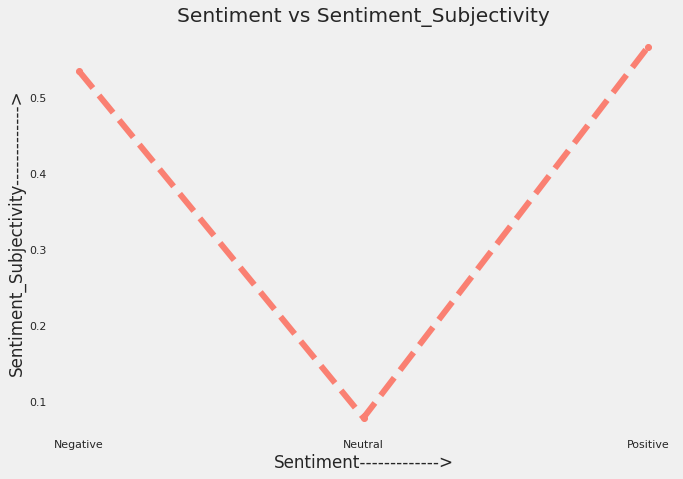

In [44]:
group=dataset1.groupby("Sentiment").agg({"Sentiment_Polarity":"sum","Sentiment_Subjectivity":"mean"}).reset_index()
result = pd.DataFrame(group)
plt.figure(figsize=(10,7))
plt.grid()
plt.style.use("fivethirtyeight")
plt.plot(result["Sentiment"],result["Sentiment_Subjectivity"], label="Sentiment_Subjectivity",
          color="salmon",linestyle="--",marker="o",linewidth=6)
plt.xlabel("Sentiment------------->")
plt.ylabel("Sentiment_Subjectivity------------->")
plt.title("Sentiment vs Sentiment_Subjectivity")


* The above line has a Sentiment_Subjectivity of 0.55 for Negative sentiments and Positive sentiments of 0.60.
* Sentiment_Subjectivity > 0.5(refers to that mostly it is public opinion and not a piece of factual information)

I know u got bored but Sentiment is also an important part of our story, we can't ignore it let's move further on to the interesting part of our story.

**But the story never ends without witnessing any villains. So it is required to witness the villians of our data.**

###**Examining missing/Null values**

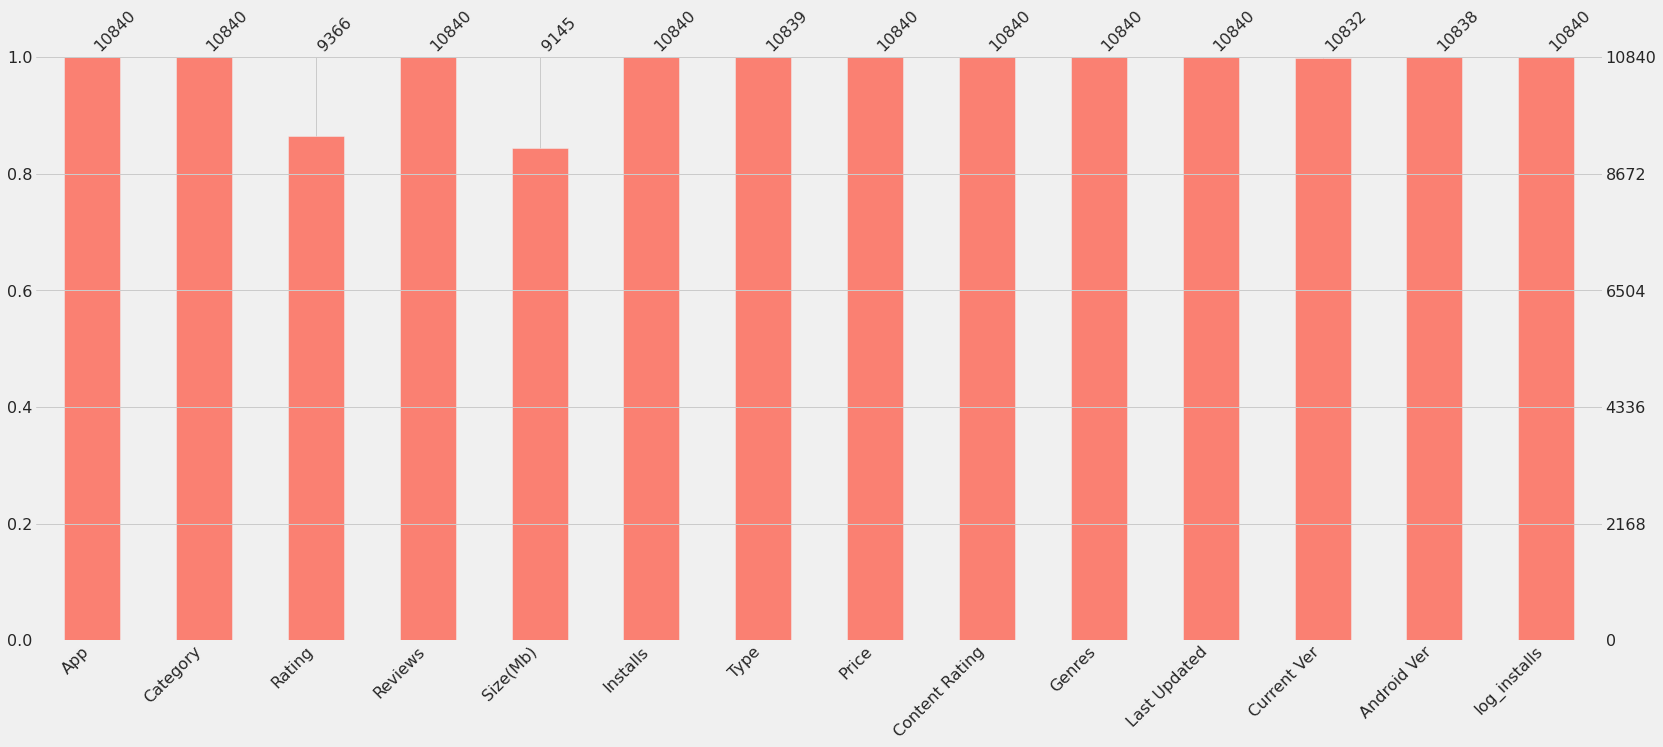

In [45]:
# We are using missingno lib to visualise missing values of our dataset
import missingno as msno
#msno.matrix(dataset)
msno.bar(dataset,color="salmon")

* As we witnessed... Rating,Size,Current Ver. and Android Ver. have null values but our visualizations were not affected by this as we handled them during processing.
Our hero is NaNproof XD.
* Now let's check number of null values in all columns

In [46]:
# We use 'sum()' function to show us how many nulls are found in each column in dataset
dataset.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size(Mb)          1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
log_installs         0
dtype: int64

In [47]:
# calculating the null values in percentage.
features_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]

for feature in features_with_nan:
  print('{}:{}% missing values'.format( feature, np.round(dataset[feature].isnull().mean()*100,2 ) ))
  #print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')  

Rating:13.6% missing values
Size(Mb):15.64% missing values
Current Ver:0.07% missing values
Android Ver:0.02% missing values


* let's see the same function in other way too for our better understanding.

In [48]:
# Calculating the null values in percentage.
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'column_name': dataset.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
App,App,0.000000
Category,Category,0.000000
Rating,Rating,13.597786
Reviews,Reviews,0.000000
Size(Mb),Size(Mb),15.636531
Installs,Installs,0.000000
Type,Type,0.009225
Price,Price,0.000000
Content Rating,Content Rating,0.000000
Genres,Genres,0.000000


* We can see that the "Rating" and "Size(Mb)" columns have the highest number of missing values about 13.59 percent and 18.55 percent . 
* let's find Categorical null values and replace them with a new text("Missing")

In [49]:
# list of categorical variables
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']

print('Number of numerical variables: ', len(categorical_features))

# show the categorical variables
dataset[categorical_features].head()

Number of numerical variables:  8


,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [50]:
## Here we will check the percentage of nan values present in numerical feature
## 1 -step make the list of features which has missing values
cat_feature_nan=[ feature for feature in dataset.columns
              if dataset[feature].isnull().sum()>1
              and dataset[feature].dtypes == 'O']
for feature in cat_feature_nan:
  #print(feature,np.round(dataset[feature].isnull().mean()*100,2 ))  
  print('{}:{}% missing values'.format( feature, np.round(dataset[feature].isnull().mean()*100,2 ) ))

Current Ver:0.07% missing values
Android Ver:0.02% missing values


In [51]:
##  replace missing values with a new label
def replace_cat_feature(dataset,cat_feature_nan):
    # lets make a copy so that our make data will not affected
    data=dataset.copy()
    data[cat_feature_nan]=data[cat_feature_nan].fillna('Missing')
    return data
# lets call the above function 
dataset=replace_cat_feature(dataset,cat_feature_nan)
dataset[cat_feature_nan].isnull().sum()

Current Ver    0
Android Ver    0
dtype: int64

lets find Numerical nan values and replace them with a medain of that column

In [52]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
# show the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  6


,Rating,Reviews,Size(Mb),Installs,Price,log_installs
0,4.1,159,19.0,10000.0,0.0,13.287712
1,3.9,967,14.0,500000.0,0.0,18.931569
2,4.7,87510,8.7,5000000.0,0.0,22.253497
3,4.5,215644,25.0,50000000.0,0.0,25.575425
4,4.3,967,2.8,100000.0,0.0,16.609640


In [53]:
## Here we will check the percentage of nan values present in numerical feature
## 1 -step make the list of features which has missing values
numerical_nan=[feature for feature in dataset.columns 
                if dataset[feature].isnull().sum()>1
                and dataset[feature].dtypes!='O' ]
  ## 2- step print the feature name and the percentage of missing values
for feature in numerical_nan:
    print("{}:{}% misiing values".format( feature, np.round(dataset[feature].isnull().mean()*100,2)))  

Rating:13.6% misiing values
Size(Mb):15.64% misiing values


In [54]:
## 3-Replacing the numerical Missing Values

for feature in numerical_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_nan].isnull().sum()

Rating      0
Size(Mb)    0
dtype: int64

In [55]:
# we use "fillna" function to fill the null vlaue with text("Free") in column "Type"
dataset['Type']=dataset['Type'].fillna("Free")

In [56]:
#check aggain for any null values
# We use 'sum()' function to show us how many nulls are found in each column in dataset
dataset.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size(Mb)          0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
log_installs      0
Ratingnan         0
Size(Mb)nan       0
dtype: int64

In [57]:
# save the cleaned file in directory so that we move to next step.
dataset.to_csv('/content/drive/MyDrive/capstone !/play store/Play Store cleaned.csv',index=False)

#**Conclusion**

Yayyy!!! This is the end of our story. Hope you enjoyed this journey. In this, we have seen
* How every feature has a unique impact on the story
* Why exploring data is important before starting to build ML models
* How visualizations make anything interesting.
* There's a hell lot of competition in Android market.

*Thank You !!!!*

---



---

